In [346]:
### Shariff Mohammed (40054557)

## 6 steps of data wrangling includes Discovering, Structuring, Cleaning, Enriching, Validating and Publishing

# STEP 1 DISCOVERING

import pandas as pd
pd.set_option('display.max_columns', 55)
pd.set_option('display.max_rows', 50)
data = pd.read_csv('Portal_rodents_19772002_scinameUUIDs.csv', encoding = "ISO-8859-1")

display(data)


/Users/shariffmohammed/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (11,12,13,16,17,18,33,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,species,scientificName,locality,JSON,decimalLatitude,decimalLongitude,county,state,country,sex,age,reprod,testes,vagina,pregnant,nipples,lactation,hfl,wgt,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,13.0,36.0,AB,Amphispiza bilineata,"Winterthur Gardens, Delaware",NaN,NaN,NaN,NaN,NaN,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,13.0,27.0,AB,Amphispiza bilineata,"Winterthur Gardens, Delaware",NaN,NaN,NaN,NaN,NaN,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,13.0,33.0,AS,Ammodramus savannarum,"FL; Highlands Co.; near parking area and nature trail at Archbold Biological Research Station, ca. 6 air mi S of Lake Placid. T38S, R30E, SE1/4 of SE1/4 Sec 7.",NaN,NaN,NaN,NaN,NaN,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,13.0,41.0,AS,Ammodramus savannarum,"Swampy woodland, 2 miles E of Tallahassee.","{\n""engineVersion"" : ""GLC:4.94|U:1.01374|eng:1.0"",\n""numResults"" : 1,\n""executionTimems"" : 1248.0022,\n""resultSet"" : { ""type"": ""FeatureCollection"",\n""features"": [\n{ ""type"": ""Feature"",\n""geometry"": {""type"": ""Point"", ""coordinates"": [-84.247155, 30.438056]},\n""properties"": {\n""parsePattern"" : ""Distance East of TALLAHASSEE"",\n""precision"" : ""High"",\n""score"" : 86,\n""uncertaintyRadiusMeters"" : 20330,\n""uncertaintyPolygon"" : ""Unavailable"",\n""displacedDistanceMiles"" : 2,\n""displacedHeadingDegrees"" : 90,\n""debug"" : "":GazPartMatch=False|:inAdm=True|:Adm=LEON|:orig_d=2 MI|:NPExtent=29301|:NP=TALLAHASSEE|:KFID=FL:ppl:4006|TALLAHASSEE""\n}\n}\n ],\n""crs"": { ""type"" : ""EPSG"", ""properties"" : { ""code"" : 4326 }}\n}\n}\n",30.438056,-84.247155,Leon,Florida,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13.0,72.0,AH,Ammospermophilis harrisi,Muscogee-Rerdido [Perdido] River.,"{\n""engineVersion"" : ""GLC:4.94|U:1.01374|eng:1.0"",\n""numResults"" : 2,\n""executionTimems"" : 187.2004,\n""resultSet"" : { ""type"": ""FeatureCollection"",\n""features"": [\n{ ""type"": ""Feature"",\n""geometry"": {""type"": ""Point"", ""coordinates"": [-87.38167, 30.44972]},\n""properties"": {\n""parsePattern"" : ""PERDIDO RIVER"",\n""precision"" : ""Low"",\n""score"" : 43,\n""uncertaintyRadiusMeters"" : 210,\n""uncertaintyPolygon"" : ""Unavailable"",\n""displacedDistanceMiles"" : 0,\n""displacedHeadingDegrees"" : 0,\n""debug"" : "":GazPartMatch=False|:inAdm=True|:Adm=ESCAMBIA|:NPExtent=350|:NP=PERDIDO RIVER|:KFID=|PERDIDO RIVER""\n}\n},\n{ ""type"": ""Feature"",\n""geometry"": {""type"": ""Point"", ""coordinates"": [-87.39667, 30.60556]},\n""properties"": {\n""parsePattern"" : ""MUSCOGEE"",\n""precision"" : ""Low"",\n""score"" : 38,\n""uncertaintyRadiusMeters"" : 3036,\n""uncertaintyPolygon"" : ""Unavailable"",\n""displacedDistanceMiles"" : 0,\n""displacedHeadingDegrees"" : 0,\n""debug"" : "":GazPartMatch=False|:inAdm=True|:Adm=ESCAMBIA|:NPExtent=5040|:NP=MUSCOGEE|:KFID=|MUSCOGEE""\n}\n}\n ],\n""crs"": { ""type"" : ""EPSG"", ""properties"" : { ""code"" : 4326 }}\n}\n}\n",30.449720,-87.381670,Escambia,Florida,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [347]:
# checking data types for all columns
display(data.dtypes)

survey_id            object
recordID              int64
mo                    int64
dy                    int64
yr                    int64
period              float64
plot_id              object
plot                  int64
note1               float64
stake               float64
species              object
scientificName       object
locality             object
JSON                 object
decimalLatitude     float64
decimalLongitude    float64
county               object
state                object
country              object
sex                  object
age                  object
reprod               object
testes               object
vagina               object
pregnant             object
nipples              object
lactation            object
hfl                 float64
wgt                 float64
tag                  object
note2                object
ltag                 object
note3                object
prevrt               object
prevlet             float64
nestdir             

In [348]:
# Using our quantDDA function from lab 2 to see the data statistics of this data set

def quantDDA(data):
    unique_entries = data.nunique() 
    missing_entries = data.isnull().sum()
    mode = data.mode()[0:1] 
    mean = data.mean()
    std = data.std()
    minim = data.min()
    maxim = data.max()
    q3 = data.quantile(0.75)
    q2_median = data.quantile(0.5)
    q1 = data.quantile(0.25)
    IQR = q3 - q1
    extreme_vals_lower = q3 - (3 * IQR)
    extreme_vals_upper = q3 + (3 * IQR)
    outliers = ((data < (q1 - 1.5 * IQR)) | (data > (q3 + 1.5 * IQR))).sum()
    skew = data.skew()
    kurtosis = data.kurt()
    
    
    #Part 3
    data["MissingValueCount"] = data.apply(lambda x: x.isnull().sum(), axis=1) #creating new column for dataset
    display(data)
    
    print('Number of observations:', len(data))
    print('Number of entries:', data.size,'\n\n')
    print('Displaying mode:')
    display(mode)
    
    result = pd.concat([
                      unique_entries.rename('unique_entries'),  
                      missing_entries.rename('missing_entries'),
                      extreme_vals_lower.rename('extr_val_lower'),
                      extreme_vals_upper.rename('extr_val_upper'),
                      outliers.rename('outliers'),
                      mean.rename('mean'),
                      std.rename('std_dev'),
                      maxim.rename('max'),
                      minim.rename('min'),
                      q3.rename('Q3'),
                      q2_median.rename('Q2 (med)'),
                      q1.rename('Q1'),
                      skew.rename('skew'),
                      kurtosis.rename('kurtosis')], axis=1).T #wasn't sure if we keep the 1st column unamed so I left it there incase
    print('\n\n Displaying rest of the quantitative desciptions:')
    display(result)

    
quantDDA(data)

,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,species,scientificName,locality,JSON,decimalLatitude,decimalLongitude,county,state,country,sex,age,reprod,testes,vagina,pregnant,nipples,lactation,hfl,wgt,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5,MissingValueCount
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,13.0,36.0,AB,Amphispiza bilineata,"Winterthur Gardens, Delaware",NaN,NaN,NaN,NaN,NaN,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,13.0,27.0,AB,Amphispiza bilineata,"Winterthur Gardens, Delaware",NaN,NaN,NaN,NaN,NaN,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,13.0,33.0,AS,Ammodramus savannarum,"FL; Highlands Co.; near parking area and nature trail at Archbold Biological Research Station, ca. 6 air mi S of Lake Placid. T38S, R30E, SE1/4 of SE1/4 Sec 7.",NaN,NaN,NaN,NaN,NaN,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,24
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,13.0,41.0,AS,Ammodramus savannarum,"Swampy woodland, 2 miles E of Tallahassee.","{\n""engineVersion"" : ""GLC:4.94|U:1.01374|eng:1.0"",\n""numResults"" : 1,\n""executionTimems"" : 1248.0022,\n""resultSet"" : { ""type"": ""FeatureCollection"",\n""features"": [\n{ ""type"": ""Feature"",\n""geometry"": {""type"": ""Point"", ""coordinates"": [-84.247155, 30.438056]},\n""properties"": {\n""parsePattern"" : ""Distance East of TALLAHASSEE"",\n""precision"" : ""High"",\n""score"" : 86,\n""uncertaintyRadiusMeters"" : 20330,\n""uncertaintyPolygon"" : ""Unavailable"",\n""displacedDistanceMiles"" : 2,\n""displacedHeadingDegrees"" : 90,\n""debug"" : "":GazPartMatch=False|:inAdm=True|:Adm=LEON|:orig_d=2 MI|:NPExtent=29301|:NP=TALLAHASSEE|:KFID=FL:ppl:4006|TALLAHASSEE""\n}\n}\n ],\n""crs"": { ""type"" : ""EPSG"", ""properties"" : { ""code"" : 4326 }}\n}\n}\n",30.438056,-84.247155,Leon,Florida,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13.0,72.0,AH,Ammospermophilis harrisi,Muscogee-Rerdido [Perdido] River.,"{\n""engineVersion"" : ""GLC:4.94|U:1.01374|eng:1.0"",\n""numResults"" : 2,\n""executionTimems"" : 187.2004,\n""resultSet"" : { ""type"": ""FeatureCollection"",\n""features"": [\n{ ""type"": ""Feature"",\n""geometry"": {""type"": ""Point"", ""coordinates"": [-87.38167, 30.44972]},\n""properties"": {\n""parsePattern"" : ""PERDIDO RIVER"",\n""precision"" : ""Low"",\n""score"" : 43,\n""uncertaintyRadiusMeters"" : 210,\n""uncertaintyPolygon"" : ""Unavailable"",\n""displacedDistanceMiles"" : 0,\n""displacedHeadingDegrees"" : 0,\n""debug"" : "":GazPartMatch=False|:inAdm=True|:Adm=ESCAMBIA|:NPExtent=350|:NP=PERDIDO RIVER|:KFID=|PERDIDO RIVER""\n}\n},\n{ ""type"": ""Feature"",\n""geometry"": {""type"": ""Point"", ""coordinates"": [-87.39667, 30.60556]},\n""properties"": {\n""parsePattern"" : ""MUSCOGEE"",\n""precision"" : ""Low"",\n""score"" : 38,\n""uncertaintyRadiusMeters"" : 3036,\n""uncertaintyPolygon"" : ""Unavailable"",\n""displacedDistanceMiles"" : 0,\n""displacedHeadingDegrees"" : 0,\n""debug"" : "":GazPartMatch=False|:inAdm=True|:Adm=ESCAMBIA|:NPExtent=5040|:NP=MUSCOGEE|:KFID=|MUSCOGEE""\n}\n}\n ],\n""crs"": { ""type"" : ""EPSG"", ""properties"" : { ""code"" : 4326 }}\n}\n}\n",30.449720,-87.381670,Escambia,Florida,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Number of observations: 35549
Number of entries: 1421960 


Displaying mode:


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,species,scientificName,locality,JSON,decimalLatitude,decimalLongitude,county,state,country,sex,age,reprod,testes,vagina,pregnant,nipples,lactation,hfl,wgt,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5
0,00007bf9-f74b-43dc-985a-acd76d249bf8,1,7.0,16.0,1997.0,-44.5,91829d58-c12e-47e8-ae31-185f46be21d2,12.0,13.0,11.0,DM,Dipodomys merriami,Copalinga Private Reserve-red trail (1420m),"{\n""engineVersion"" : ""GLC:4.94|U:1.01374|eng:1.0"",\n""numResults"" : 2,\n""executionTimems"" : 187.2003,\n""resultSet"" : { ""type"": ""FeatureCollection"",\n""features"": [\n{ ""type"": ""Feature"",\n""geometry"": {""type"": ""Point"", ""coordinates"": [-115.855953, 45.390995]},\n""properties"": {\n""parsePattern"" : ""Distance NorthWest of WARREN"",\n""precision"" : ""High"",\n""score"" : 81,\n""uncertaintyRadiusMeters"" : 8974,\n""uncertaintyPolygon"" : ""Unavailable"",\n""displacedDistanceMiles"" : 12.4,\n""displacedHeadingDegrees"" : 315,\n""debug"" : "":GazPartMatch=False|:inAdm=True|:Adm=IDAHO|:orig_d=12.4 MI|:NPExtent=5040|:NP=WARREN|:KFID=|WARREN""\n}\n},\n{ ""type"": ""Feature"",\n""geometry"": {""type"": ""Point"", ""coordinates"": [-115.91194, 45.27722]},\n""properties"": {\n""parsePattern"" : ""BURGDORF"",\n""precision"" : ""Low"",\n""score"" : 38,\n""uncertaintyRadiusMeters"" : 3036,\n""uncertaintyPolygon"" : ""Unavailable"",\n""displacedDistanceMiles"" : 0,\n""displacedHeadingDegrees"" : 0,\n""debug"" : "":GazPartMatch=False|:inAdm=True|:Adm=IDAHO|:NPExtent=5040|:NP=BURGDORF|:KFID=|BURGDORF""\n}\n}\n ],\n""crs"": { ""type"" : ""EPSG"", ""properties"" : { ""code"" : 4326 }}\n}\n}\n",45.390995,-115.9427,Idaho,Zamora-Chinchipe Province,ECUADOR,M,Z,J,S,S,P,E,L,36.0,46.0,0,*,0,*,0,0.0,SE,0.0,TE,R




 Displaying rest of the quantitative desciptions:


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,species,scientificName,locality,JSON,decimalLatitude,decimalLongitude,county,state,country,sex,age,reprod,testes,vagina,pregnant,nipples,lactation,hfl,wgt,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5
unique_entries,35549,35549,12,31,26,322,24,24,11,80,47,28,79,41,12,12,12,7,7,5,3,4,6,7,5,5,4,56,255,9347,2,971,1,181,17,15,82,6,3
missing_entries,0,0,0,0,0,0,0,0,31957,70,2015,15318,34874,35483,35489,35489,35453,35183,34871,2506,20103,33898,25857,33952,34327,30521,35423,4111,3266,2324,30965,1901,35533,1780,2071,33718,30113,34908,32451
extr_val_lower,NaN,-26660,-6,-19,1958,-249,NaN,-19,-11,-53,NaN,NaN,NaN,NaN,44.9769,-117.684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9,-36,NaN,NaN,NaN,NaN,NaN,0,NaN,-86,NaN,NaN
extr_val_upper,NaN,79984,24,65,2036,717,NaN,53,37,181,NaN,NaN,NaN,NaN,46.2183,-112.393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81,132,NaN,NaN,NaN,NaN,NaN,0,NaN,172,NaN,NaN
outliers,0,0,0,0,0,70,0,0,0,94,0,0,0,0,21,12,0,0,0,0,0,0,0,0,0,0,0,2,3178,0,0,0,0,0,31,0,0,0,0
mean,NaN,17775,6.47402,16.106,1990.48,149.534,NaN,11.397,7.3221,44.8041,NaN,NaN,NaN,NaN,42.51,-109.476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.2879,42.6724,NaN,NaN,NaN,NaN,NaN,2.57922,NaN,19.7564,NaN,NaN
std_dev,NaN,10262.3,3.39658,8.25669,7.49336,97.0927,NaN,6.79941,4.21671,23.4533,NaN,NaN,NaN,NaN,6.32868,12.5516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.56476,36.6313,NaN,NaN,NaN,NaN,NaN,100.371,NaN,26.5344,NaN,NaN
max,fffef9f2-3928-4e2c-9fa8-b81428fd88a7,35549,12,31,2002,295,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13,99,NaN,NaN,NaN,NaN,46.3378,-82.3594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70,280,NaN,NaN,NaN,NaN,NaN,8000,NaN,99,NaN,NaN
min,00007bf9-f74b-43dc-985a-acd76d249bf8,1,1,1,1977,-284,01f5316e-7875-47a2-9ebe-088ae7239d4f,1,1,-99,NaN,NaN,NaN,NaN,28.6344,-115.943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN,0,NaN,-2,NaN,NaN
Q3,NaN,26662,9,23,1997,234,NaN,17,13,64,NaN,NaN,NaN,NaN,45.5976,-115.038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,48,NaN,NaN,NaN,NaN,NaN,0,NaN,43,NaN,NaN


In [349]:
## STEP 2 & 3 STRUCTURING AND CLEANING
# We can notice that several columns has way too many missing values very close to our observation count
# We will handle this by removing columns entirely where more than 4500 of the rows for that column 
# contain a null value with the exception of our scientificName column which will be modified with the help of species.csv

# Reason for dropping age is because first of all it is a categorical variable and we have over 20000 entries missing so it cannot be replaced by 0's
# We will be dropping all the notes column because note 2, 3, 4 and 5 are categorical and there are too many missing values
# Same reason will be applied to locality, JSON, county, state, country, reprod, testes, vagina, pregnant, nipples, lactation, neststk and nestdir

to_drop = ['note1', 'locality', 'JSON', 'decimalLatitude', 'decimalLongitude', 'county', 'state', 'country',
          'age', 'reprod', 'testes', 'vagina', 'pregnant', 'nipples', 'lactation', 'note2', 'note3', 'neststk', 'nestdir',
          'note4', 'note5']

data.drop(to_drop, inplace=True, axis=1)

In [350]:
display(data)

,survey_id,recordID,mo,dy,yr,period,plot_id,plot,stake,species,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,36.0,AB,Amphispiza bilineata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,27.0,AB,Amphispiza bilineata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,33.0,AS,Ammodramus savannarum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,41.0,AS,Ammodramus savannarum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,72.0,AH,Ammospermophilis harrisi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,5e05640b-d193-482a-9e8d-10608f4e810b,35542,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,23.0,PB,NaN,F,26.0,29.0,0F7659,0,0,0.0,21
35545,a6bbdcbb-2c0a-4d3f-85a0-62a73270a108,35543,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,77.0,PB,NaN,F,27.0,34.0,701178,0,0,0.0,21
35546,67137ae7-0919-49c3-bd8f-4afda8162994,35544,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,64.0,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
35547,2bcb411b-9e81-42f6-a8db-aff0f863b564,35547,12,31,2002,295.0,c85de67c-1590-4129-8953-0c530a565585,10,32.0,RM,NaN,F,15.0,14.0,NaN,0,0,0.0,21


In [351]:
quantDDA(data)

,survey_id,recordID,mo,dy,yr,period,plot_id,plot,stake,species,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,36.0,AB,Amphispiza bilineata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,27.0,AB,Amphispiza bilineata,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,33.0,AS,Ammodramus savannarum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,41.0,AS,Ammodramus savannarum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,72.0,AH,Ammospermophilis harrisi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,5e05640b-d193-482a-9e8d-10608f4e810b,35542,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,23.0,PB,NaN,F,26.0,29.0,0F7659,0,0,0.0,1
35545,a6bbdcbb-2c0a-4d3f-85a0-62a73270a108,35543,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,77.0,PB,NaN,F,27.0,34.0,701178,0,0,0.0,1
35546,67137ae7-0919-49c3-bd8f-4afda8162994,35544,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,64.0,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
35547,2bcb411b-9e81-42f6-a8db-aff0f863b564,35547,12,31,2002,295.0,c85de67c-1590-4129-8953-0c530a565585,10,32.0,RM,NaN,F,15.0,14.0,NaN,0,0,0.0,2


Number of observations: 35549
Number of entries: 675431 


Displaying mode:


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,stake,species,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
0,00007bf9-f74b-43dc-985a-acd76d249bf8,1,7.0,16.0,1997.0,-44.5,91829d58-c12e-47e8-ae31-185f46be21d2,12.0,11.0,DM,Dipodomys merriami,M,36.0,46.0,0,0,0,0.0,20.0




 Displaying rest of the quantitative desciptions:


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,stake,species,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
unique_entries,35549,35549,12,31,26,322,24,24,80,47,28,5,56,255,9347,971,181,17,16
missing_entries,0,0,0,0,0,0,0,0,70,2015,15318,2506,4111,3266,2324,1901,1780,2071,0
extr_val_lower,NaN,-26660,-6,-19,1958,-249,NaN,-19,-53,NaN,NaN,NaN,-9,-36,NaN,NaN,NaN,0,18
extr_val_upper,NaN,79984,24,65,2036,717,NaN,53,181,NaN,NaN,NaN,81,132,NaN,NaN,NaN,0,24
outliers,0,0,0,0,0,70,0,0,94,0,0,0,2,3178,0,0,0,31,4695
mean,NaN,17775,6.47402,16.106,1990.48,149.534,NaN,11.397,44.8041,NaN,NaN,NaN,29.2879,42.6724,NaN,NaN,NaN,2.57922,20.4205
std_dev,NaN,10262.3,3.39658,8.25669,7.49336,97.0927,NaN,6.79941,23.4533,NaN,NaN,NaN,9.56476,36.6313,NaN,NaN,NaN,100.371,1.90757
max,fffef9f2-3928-4e2c-9fa8-b81428fd88a7,35549,12,31,2002,295,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,99,NaN,NaN,NaN,70,280,NaN,NaN,NaN,8000,30
min,00007bf9-f74b-43dc-985a-acd76d249bf8,1,1,1,1977,-284,01f5316e-7875-47a2-9ebe-088ae7239d4f,1,-99,NaN,NaN,NaN,2,4,NaN,NaN,NaN,0,15
Q3,NaN,26662,9,23,1997,234,NaN,17,64,NaN,NaN,NaN,36,48,NaN,NaN,NaN,0,21


In [352]:
# Checking if the remaining numerical value columns with missing entries contain a 0 to determine if 0 is a legitimate
# value in the columns and if we should replce the NaNs with 0s in order to fill in the missing entries for columns
# containing float or int data type

if 0 in data.hfl.values:
    print('true')
else:
    print('false')
    
if 0 in data.stake.values:
    print('true')
else:
    print('false')
    
if 0 in data.wgt.values:
    print('true')
else:
    print('false')
    
if 0 in data.tag.values:
    print('true')
else:
    print('false')
    
if 0 in data.ltag.values:
    print('true')
else:
    print('false')
    
if 0 in data.prevrt.values:
    print('true')
else:
    print('false')
    
if 0 in data.prevlet.values:
    print('true')
else:
    print('false')

false
true
false
false
false
true
true


In [353]:
# We see that in the tag and ltag column, there are 0 values and empty entries, since in some cases 0 might be a legitimate value
# but in this scenario since we are dealing with tags, 0 must indicate that there are no tags. We will be replacing
# all the entries in these columns from NaN to 0. The same thing can be applied to hfl, stake, wgt, tag, ltag, prevrt and prevlet

data['stake'] = data['stake'].fillna(0)
data['hfl'] = data['hfl'].fillna(0)
data['wgt'] = data['wgt'].fillna(0)
data['tag'] = data['tag'].fillna(0)
data['ltag'] = data['ltag'].fillna(0)
data['prevrt'] = data['prevrt'].fillna(0)
data['prevlet'] = data['prevlet'].fillna(0)

In [354]:
# updating DDA
quantDDA(data)

,survey_id,recordID,mo,dy,yr,period,plot_id,plot,stake,species,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,36.0,AB,Amphispiza bilineata,NaN,0.0,0.0,0,0,0,0.0,1
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,27.0,AB,Amphispiza bilineata,NaN,0.0,0.0,0,0,0,0.0,1
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,33.0,AS,Ammodramus savannarum,NaN,0.0,0.0,0,0,0,0.0,1
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,41.0,AS,Ammodramus savannarum,NaN,0.0,0.0,0,0,0,0.0,1
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,72.0,AH,Ammospermophilis harrisi,NaN,0.0,0.0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,5e05640b-d193-482a-9e8d-10608f4e810b,35542,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,23.0,PB,NaN,F,26.0,29.0,0F7659,0,0,0.0,1
35545,a6bbdcbb-2c0a-4d3f-85a0-62a73270a108,35543,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,77.0,PB,NaN,F,27.0,34.0,701178,0,0,0.0,1
35546,67137ae7-0919-49c3-bd8f-4afda8162994,35544,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,64.0,US,NaN,NaN,0.0,0.0,0,0,0,0.0,2
35547,2bcb411b-9e81-42f6-a8db-aff0f863b564,35547,12,31,2002,295.0,c85de67c-1590-4129-8953-0c530a565585,10,32.0,RM,NaN,F,15.0,14.0,0,0,0,0.0,1


Number of observations: 35549
Number of entries: 675431 


Displaying mode:


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,stake,species,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
0,00007bf9-f74b-43dc-985a-acd76d249bf8,1,7.0,16.0,1997.0,-44.5,91829d58-c12e-47e8-ae31-185f46be21d2,12.0,11.0,DM,Dipodomys merriami,M,0.0,0.0,0,0,0,0.0,0.0




 Displaying rest of the quantitative desciptions:


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,stake,species,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
unique_entries,35549,35549,12,31,26,322,24,24,80,47,28,5,57,256,9348,972,181,17,11
missing_entries,0,0,0,0,0,0,0,0,0,2015,15318,2506,0,0,0,0,0,0,0
extr_val_lower,NaN,-26660,-6,-19,1958,-249,NaN,-19,-53,NaN,NaN,NaN,-15,-46,NaN,NaN,NaN,0,-2
extr_val_upper,NaN,79984,24,65,2036,717,NaN,53,181,NaN,NaN,NaN,87,140,NaN,NaN,NaN,0,4
outliers,0,0,0,0,0,70,0,0,94,0,0,0,2,3127,0,0,0,31,2701
mean,NaN,17775,6.47402,16.106,1990.48,149.534,NaN,11.397,44.7159,NaN,NaN,NaN,25.901,38.752,NaN,NaN,NaN,2.42896,0.99474
std_dev,NaN,10262.3,3.39658,8.25669,7.49336,97.0927,NaN,6.79941,23.5143,NaN,NaN,NaN,12.9859,37.0202,NaN,NaN,NaN,97.4055,1.82442
max,fffef9f2-3928-4e2c-9fa8-b81428fd88a7,35549,12,31,2002,295,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,99,NaN,NaN,NaN,70,280,NaN,NaN,NaN,8000,10
min,00007bf9-f74b-43dc-985a-acd76d249bf8,1,1,1,1977,-284,01f5316e-7875-47a2-9ebe-088ae7239d4f,1,-99,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
Q3,NaN,26662,9,23,1997,234,NaN,17,64,NaN,NaN,NaN,36,47,NaN,NaN,NaN,0,1


In [355]:
# With the help of OpenRefine we found that scientificName column had several issues, one of them being that some
# observations had leading/trailing white spaces as shown below

display(data['scientificName'])

0            Amphispiza bilineata
1          Amphispiza bilineata  
2           Ammodramus savannarum
3           Ammodramus savannarum
4        Ammospermophilis harrisi
                   ...           
35544                         NaN
35545                         NaN
35546                         NaN
35547                         NaN
35548                         NaN
Name: scientificName, Length: 35549, dtype: object

In [356]:
# We are resolving it and now it looks better
data['scientificName'] = data['scientificName'].str.strip()
display(data['scientificName'])

0            Amphispiza bilineata
1            Amphispiza bilineata
2           Ammodramus savannarum
3           Ammodramus savannarum
4        Ammospermophilis harrisi
                   ...           
35544                         NaN
35545                         NaN
35546                         NaN
35547                         NaN
35548                         NaN
Name: scientificName, Length: 35549, dtype: object

In [357]:
# With the help of OpenRefine and species.csv, we see that scientificName has several errors on Ammospermophilus harrisi
data.iloc[4:10,9:11].append(data.iloc[440:441,9:11])

,species,scientificName
4,AH,Ammospermophilis harrisi
5,AH,Ammospermophilus harrisi
6,AH,Ammospermophilus harrisi
7,AH,Ammospermophilus harrisi
8,AH,Ammospermophilus harrisi
9,AH,Ammospermophilus harrisi
440,AH,Ammospermophilus harrisii


In [358]:
# Same goes for Amphispiza bilineata
data.iloc[441:444,9:11].append(data.iloc[0:2,9:11]).append(data.iloc[737:740,9:11]).append(data.iloc[16962:16964,9:11])

,species,scientificName
441,AB,Amphespiza bilineata
442,AB,Amphespiza bilineata
443,AB,Amphespiza bilineata
0,AB,Amphispiza bilineata
1,AB,Amphispiza bilineata
737,AB,Amphispiza bilineatus
738,AB,Amphispiza cilineata
739,AB,Amphispizo bilineata
16962,AB,Emphispiza bilinata
16963,AB,Emphispiza bilinata


In [359]:
# We shall modify the entries with the typos
data.loc[(data.scientificName == "Ammospermophilis harrisi") | (data.scientificName == "Ammospermophilus harrisii"), "scientificName"] = "Ammospermophilus harrisi"
data.iloc[4:10,9:11].append(data.iloc[440:441,9:11])

,species,scientificName
4,AH,Ammospermophilus harrisi
5,AH,Ammospermophilus harrisi
6,AH,Ammospermophilus harrisi
7,AH,Ammospermophilus harrisi
8,AH,Ammospermophilus harrisi
9,AH,Ammospermophilus harrisi
440,AH,Ammospermophilus harrisi


In [360]:
data.loc[(data.scientificName == "Amphispiza bilineatus") | (data.scientificName == "Amphespiza bilineata") | (data.scientificName == "Amphispiza cilineata") | (data.scientificName == "Amphispizo bilineata") | (data.scientificName == "Emphispiza bilinata"), "scientificName"] = "Amphispiza bilineata"
data.iloc[441:444,9:11].append(data.iloc[0:2,9:11]).append(data.iloc[737:740,9:11]).append(data.iloc[16962:16964,9:11])


,species,scientificName
441,AB,Amphispiza bilineata
442,AB,Amphispiza bilineata
443,AB,Amphispiza bilineata
0,AB,Amphispiza bilineata
1,AB,Amphispiza bilineata
737,AB,Amphispiza bilineata
738,AB,Amphispiza bilineata
739,AB,Amphispiza bilineata
16962,AB,Amphispiza bilineata
16963,AB,Amphispiza bilineata


In [361]:
#After running quantDDA again the number of unique entires should go down for scientificName
quantDDA(data)

,survey_id,recordID,mo,dy,yr,period,plot_id,plot,stake,species,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,36.0,AB,Amphispiza bilineata,NaN,0.0,0.0,0,0,0,0.0,1
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,27.0,AB,Amphispiza bilineata,NaN,0.0,0.0,0,0,0,0.0,1
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,33.0,AS,Ammodramus savannarum,NaN,0.0,0.0,0,0,0,0.0,1
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,41.0,AS,Ammodramus savannarum,NaN,0.0,0.0,0,0,0,0.0,1
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,72.0,AH,Ammospermophilus harrisi,NaN,0.0,0.0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,5e05640b-d193-482a-9e8d-10608f4e810b,35542,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,23.0,PB,NaN,F,26.0,29.0,0F7659,0,0,0.0,1
35545,a6bbdcbb-2c0a-4d3f-85a0-62a73270a108,35543,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,77.0,PB,NaN,F,27.0,34.0,701178,0,0,0.0,1
35546,67137ae7-0919-49c3-bd8f-4afda8162994,35544,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,64.0,US,NaN,NaN,0.0,0.0,0,0,0,0.0,2
35547,2bcb411b-9e81-42f6-a8db-aff0f863b564,35547,12,31,2002,295.0,c85de67c-1590-4129-8953-0c530a565585,10,32.0,RM,NaN,F,15.0,14.0,0,0,0,0.0,1


Number of observations: 35549
Number of entries: 675431 


Displaying mode:


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,stake,species,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
0,00007bf9-f74b-43dc-985a-acd76d249bf8,1,7.0,16.0,1997.0,-44.5,91829d58-c12e-47e8-ae31-185f46be21d2,12.0,11.0,DM,Dipodomys merriami,M,0.0,0.0,0,0,0,0.0,0.0




 Displaying rest of the quantitative desciptions:


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,stake,species,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
unique_entries,35549,35549,12,31,26,322,24,24,80,47,19,5,57,256,9348,972,181,17,4
missing_entries,0,0,0,0,0,0,0,0,0,2015,15318,2506,0,0,0,0,0,0,0
extr_val_lower,NaN,-26660,-6,-19,1958,-249,NaN,-19,-53,NaN,NaN,NaN,-15,-46,NaN,NaN,NaN,0,-2
extr_val_upper,NaN,79984,24,65,2036,717,NaN,53,181,NaN,NaN,NaN,87,140,NaN,NaN,NaN,0,4
outliers,0,0,0,0,0,70,0,0,94,0,0,0,2,3127,0,0,0,31,838
mean,NaN,17775,6.47402,16.106,1990.48,149.534,NaN,11.397,44.7159,NaN,NaN,NaN,25.901,38.752,NaN,NaN,NaN,2.42896,0.558075
std_dev,NaN,10262.3,3.39658,8.25669,7.49336,97.0927,NaN,6.79941,23.5143,NaN,NaN,NaN,12.9859,37.0202,NaN,NaN,NaN,97.4055,0.702344
max,fffef9f2-3928-4e2c-9fa8-b81428fd88a7,35549,12,31,2002,295,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,99,NaN,NaN,NaN,70,280,NaN,NaN,NaN,8000,3
min,00007bf9-f74b-43dc-985a-acd76d249bf8,1,1,1,1977,-284,01f5316e-7875-47a2-9ebe-088ae7239d4f,1,-99,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
Q3,NaN,26662,9,23,1997,234,NaN,17,64,NaN,NaN,NaN,36,47,NaN,NaN,NaN,0,1


In [362]:
# We also see that some column names are inconsistent. We shall be renaming them
data = data.rename(columns={'recordID': 'record_id', 'species': 'species_id'})

data

,survey_id,record_id,mo,dy,yr,period,plot_id,plot,stake,species_id,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,36.0,AB,Amphispiza bilineata,NaN,0.0,0.0,0,0,0,0.0,1
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,27.0,AB,Amphispiza bilineata,NaN,0.0,0.0,0,0,0,0.0,1
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,33.0,AS,Ammodramus savannarum,NaN,0.0,0.0,0,0,0,0.0,1
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,41.0,AS,Ammodramus savannarum,NaN,0.0,0.0,0,0,0,0.0,1
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,72.0,AH,Ammospermophilus harrisi,NaN,0.0,0.0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,5e05640b-d193-482a-9e8d-10608f4e810b,35542,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,23.0,PB,NaN,F,26.0,29.0,0F7659,0,0,0.0,1
35545,a6bbdcbb-2c0a-4d3f-85a0-62a73270a108,35543,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,77.0,PB,NaN,F,27.0,34.0,701178,0,0,0.0,1
35546,67137ae7-0919-49c3-bd8f-4afda8162994,35544,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,64.0,US,NaN,NaN,0.0,0.0,0,0,0,0.0,2
35547,2bcb411b-9e81-42f6-a8db-aff0f863b564,35547,12,31,2002,295.0,c85de67c-1590-4129-8953-0c530a565585,10,32.0,RM,NaN,F,15.0,14.0,0,0,0,0.0,1


In [363]:
## STEP 4 ENRICHING & STEP 5 VALIDATING

# Since more than 95% of our species column is filled and we have our species.csv file, 
# we know the exact name of each species in scientificName so we will be adding it to our data frame 
# instead of dropping this column. This will help us get a better understanding of our data set

data.loc[(data['species_id'] == 'AB') & (data['scientificName'].isnull()), 'scientificName'] = 'Amphispiza bilineata'
data.loc[(data['species_id'] == 'AH') & (data['scientificName'].isnull()), 'scientificName'] = 'Ammospermophilus harrisi'
data.loc[(data['species_id'] == 'AS') & (data['scientificName'].isnull()), 'scientificName'] = 'Ammodramus savannarum'
data.loc[(data['species_id'] == 'BA') & (data['scientificName'].isnull()), 'scientificName'] = 'Baiomys taylori'
data.loc[(data['species_id'] == 'CB') & (data['scientificName'].isnull()), 'scientificName'] = 'Campylorhynchus brunneicapillus'
data.loc[(data['species_id'] == 'CM') & (data['scientificName'].isnull()), 'scientificName'] = 'Calamospiza melanocorys'
data.loc[(data['species_id'] == 'CQ') & (data['scientificName'].isnull()), 'scientificName'] = 'Callipepla squamata'
data.loc[(data['species_id'] == 'CS') & (data['scientificName'].isnull()), 'scientificName'] = 'Crotalus scutalatus'
data.loc[(data['species_id'] == 'CT') & (data['scientificName'].isnull()), 'scientificName'] = 'Cnemidophorus tigris'
data.loc[(data['species_id'] == 'CU') & (data['scientificName'].isnull()), 'scientificName'] = 'Cnemidophorus uniparens'
data.loc[(data['species_id'] == 'CV') & (data['scientificName'].isnull()), 'scientificName'] = 'Crotalus viridis'
data.loc[(data['species_id'] == 'DM') & (data['scientificName'].isnull()), 'scientificName'] = 'Dipodomys merriami'
data.loc[(data['species_id'] == 'DO') & (data['scientificName'].isnull()), 'scientificName'] = 'Dipodomys ordii'
data.loc[(data['species_id'] == 'DS') & (data['scientificName'].isnull()), 'scientificName'] = 'Dipodomys spectabilis'
data.loc[(data['species_id'] == 'DX') & (data['scientificName'].isnull()), 'scientificName'] = 'Dipodomys sp.'
data.loc[(data['species_id'] == 'EO') & (data['scientificName'].isnull()), 'scientificName'] = 'Eumeces obsoletus'
data.loc[(data['species_id'] == 'GS') & (data['scientificName'].isnull()), 'scientificName'] = 'Gambelia silus'
data.loc[(data['species_id'] == 'NL') & (data['scientificName'].isnull()), 'scientificName'] = 'Neotoma albigula'
data.loc[(data['species_id'] == 'NX') & (data['scientificName'].isnull()), 'scientificName'] = 'Neotoma sp.'
data.loc[(data['species_id'] == 'OL') & (data['scientificName'].isnull()), 'scientificName'] = 'Onychomys leucogaster'
data.loc[(data['species_id'] == 'OT') & (data['scientificName'].isnull()), 'scientificName'] = 'Onychomys torridus'
data.loc[(data['species_id'] == 'OX') & (data['scientificName'].isnull()), 'scientificName'] = 'Onychomys sp.'
data.loc[(data['species_id'] == 'PB') & (data['scientificName'].isnull()), 'scientificName'] = 'Chaetodipus baileyi'
data.loc[(data['species_id'] == 'PC') & (data['scientificName'].isnull()), 'scientificName'] = 'Pipilo chlorurus'
data.loc[(data['species_id'] == 'PE') & (data['scientificName'].isnull()), 'scientificName'] = 'Peromyscus eremicus'
data.loc[(data['species_id'] == 'PF') & (data['scientificName'].isnull()), 'scientificName'] = 'Perognathus flavus'
data.loc[(data['species_id'] == 'PG') & (data['scientificName'].isnull()), 'scientificName'] = 'Pooecetes gramineus'
data.loc[(data['species_id'] == 'PH') & (data['scientificName'].isnull()), 'scientificName'] = 'Perognathus hispidus'
data.loc[(data['species_id'] == 'PI') & (data['scientificName'].isnull()), 'scientificName'] = 'Chaetodipus intermedius'
data.loc[(data['species_id'] == 'PL') & (data['scientificName'].isnull()), 'scientificName'] = 'Peromyscus leucopus'
data.loc[(data['species_id'] == 'PM') & (data['scientificName'].isnull()), 'scientificName'] = 'Peromyscus maniculatus'
data.loc[(data['species_id'] == 'PP') & (data['scientificName'].isnull()), 'scientificName'] = 'Chaetodipus penicillatus'
data.loc[(data['species_id'] == 'PU') & (data['scientificName'].isnull()), 'scientificName'] = 'Pipilo fuscus'
data.loc[(data['species_id'] == 'PX') & (data['scientificName'].isnull()), 'scientificName'] = 'Chaetodipus sp.'
data.loc[(data['species_id'] == 'RF') & (data['scientificName'].isnull()), 'scientificName'] = 'Reithrodontomys fulvescens'
data.loc[(data['species_id'] == 'RM') & (data['scientificName'].isnull()), 'scientificName'] = 'Reithrodontomys megalotis'
data.loc[(data['species_id'] == 'RO') & (data['scientificName'].isnull()), 'scientificName'] = 'Reithrodontomys montanus'
data.loc[(data['species_id'] == 'RX') & (data['scientificName'].isnull()), 'scientificName'] = 'Reithrodontomys sp.'
data.loc[(data['species_id'] == 'SA') & (data['scientificName'].isnull()), 'scientificName'] = 'Sylvilagus audubonii'
data.loc[(data['species_id'] == 'SB') & (data['scientificName'].isnull()), 'scientificName'] = 'Spizella breweri'
data.loc[(data['species_id'] == 'SC') & (data['scientificName'].isnull()), 'scientificName'] = 'Sceloporus clarki'
data.loc[(data['species_id'] == 'SF') & (data['scientificName'].isnull()), 'scientificName'] = 'Sigmodon fulviventer'
data.loc[(data['species_id'] == 'SH') & (data['scientificName'].isnull()), 'scientificName'] = 'Sigmodon hispidus'
data.loc[(data['species_id'] == 'SO') & (data['scientificName'].isnull()), 'scientificName'] = 'Sigmodon ochrognathus'
data.loc[(data['species_id'] == 'SS') & (data['scientificName'].isnull()), 'scientificName'] = 'Spermophilus spilosoma'
data.loc[(data['species_id'] == 'ST') & (data['scientificName'].isnull()), 'scientificName'] = 'Spermophilus tereticaudus'
data.loc[(data['species_id'] == 'SU') & (data['scientificName'].isnull()), 'scientificName'] = 'Sceloporus undulatus'
data.loc[(data['species_id'] == 'SX') & (data['scientificName'].isnull()), 'scientificName'] = 'Sigmodon sp.'
data.loc[(data['species_id'] == 'UL') & (data['scientificName'].isnull()), 'scientificName'] = 'Lizard sp.'
data.loc[(data['species_id'] == 'UP') & (data['scientificName'].isnull()), 'scientificName'] = 'Pipilo sp.'
data.loc[(data['species_id'] == 'UR') & (data['scientificName'].isnull()), 'scientificName'] = 'Rodent sp.'
data.loc[(data['species_id'] == 'US') & (data['scientificName'].isnull()), 'scientificName'] = 'Sparrow sp.'
data.loc[(data['species_id'] == 'ZL') & (data['scientificName'].isnull()), 'scientificName'] = 'Zonotrichia leucophrys'
data.loc[(data['species_id'] == 'ZM') & (data['scientificName'].isnull()), 'scientificName'] = 'Zenaida macroura'


In [364]:
quantDDA(data)

,survey_id,record_id,mo,dy,yr,period,plot_id,plot,stake,species_id,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,36.0,AB,Amphispiza bilineata,NaN,0.0,0.0,0,0,0,0.0,1
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,27.0,AB,Amphispiza bilineata,NaN,0.0,0.0,0,0,0,0.0,1
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,33.0,AS,Ammodramus savannarum,NaN,0.0,0.0,0,0,0,0.0,1
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,41.0,AS,Ammodramus savannarum,NaN,0.0,0.0,0,0,0,0.0,1
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,72.0,AH,Ammospermophilus harrisi,NaN,0.0,0.0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,5e05640b-d193-482a-9e8d-10608f4e810b,35542,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,23.0,PB,Chaetodipus baileyi,F,26.0,29.0,0F7659,0,0,0.0,0
35545,a6bbdcbb-2c0a-4d3f-85a0-62a73270a108,35543,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,77.0,PB,Chaetodipus baileyi,F,27.0,34.0,701178,0,0,0.0,0
35546,67137ae7-0919-49c3-bd8f-4afda8162994,35544,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,64.0,US,Sparrow sp.,NaN,0.0,0.0,0,0,0,0.0,1
35547,2bcb411b-9e81-42f6-a8db-aff0f863b564,35547,12,31,2002,295.0,c85de67c-1590-4129-8953-0c530a565585,10,32.0,RM,Reithrodontomys megalotis,F,15.0,14.0,0,0,0,0.0,0


Number of observations: 35549
Number of entries: 675431 


Displaying mode:


,survey_id,record_id,mo,dy,yr,period,plot_id,plot,stake,species_id,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
0,00007bf9-f74b-43dc-985a-acd76d249bf8,1,7.0,16.0,1997.0,-44.5,91829d58-c12e-47e8-ae31-185f46be21d2,12.0,11.0,DM,Dipodomys merriami,M,0.0,0.0,0,0,0,0.0,0.0




 Displaying rest of the quantitative desciptions:


,survey_id,record_id,mo,dy,yr,period,plot_id,plot,stake,species_id,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
unique_entries,35549,35549,12,31,26,322,24,24,80,47,47,5,57,256,9348,972,181,17,4
missing_entries,0,0,0,0,0,0,0,0,0,2015,2015,2506,0,0,0,0,0,0,0
extr_val_lower,NaN,-26660,-6,-19,1958,-249,NaN,-19,-53,NaN,NaN,NaN,-15,-46,NaN,NaN,NaN,0,-2
extr_val_upper,NaN,79984,24,65,2036,717,NaN,53,181,NaN,NaN,NaN,87,140,NaN,NaN,NaN,0,4
outliers,0,0,0,0,0,70,0,0,94,0,0,0,2,3127,0,0,0,31,838
mean,NaN,17775,6.47402,16.106,1990.48,149.534,NaN,11.397,44.7159,NaN,NaN,NaN,25.901,38.752,NaN,NaN,NaN,2.42896,0.558075
std_dev,NaN,10262.3,3.39658,8.25669,7.49336,97.0927,NaN,6.79941,23.5143,NaN,NaN,NaN,12.9859,37.0202,NaN,NaN,NaN,97.4055,0.702344
max,fffef9f2-3928-4e2c-9fa8-b81428fd88a7,35549,12,31,2002,295,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,99,NaN,NaN,NaN,70,280,NaN,NaN,NaN,8000,3
min,00007bf9-f74b-43dc-985a-acd76d249bf8,1,1,1,1977,-284,01f5316e-7875-47a2-9ebe-088ae7239d4f,1,-99,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,0
Q3,NaN,26662,9,23,1997,234,NaN,17,64,NaN,NaN,NaN,36,47,NaN,NaN,NaN,0,1


In [365]:
# we will be flagging the rest of the empty species, scientificName and sex column with "Missing" since they are
# categorical variables and that we do not want to omit these observations since they can be relevant
# and that there arent too much missing values (around 2000/35549 missing)

data.loc[(data['species_id'].isnull()), 'species_id'] = 'Missing'
data.loc[(data['scientificName'].isnull()), 'scientificName'] = 'Missing'
data.loc[(data['sex'].isnull()), 'sex'] = 'Missing'

quantDDA(data)

,survey_id,record_id,mo,dy,yr,period,plot_id,plot,stake,species_id,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,36.0,AB,Amphispiza bilineata,Missing,0.0,0.0,0,0,0,0.0,0
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,27.0,AB,Amphispiza bilineata,Missing,0.0,0.0,0,0,0,0.0,0
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,33.0,AS,Ammodramus savannarum,Missing,0.0,0.0,0,0,0,0.0,0
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,41.0,AS,Ammodramus savannarum,Missing,0.0,0.0,0,0,0,0.0,0
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,72.0,AH,Ammospermophilus harrisi,Missing,0.0,0.0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,5e05640b-d193-482a-9e8d-10608f4e810b,35542,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,23.0,PB,Chaetodipus baileyi,F,26.0,29.0,0F7659,0,0,0.0,0
35545,a6bbdcbb-2c0a-4d3f-85a0-62a73270a108,35543,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,77.0,PB,Chaetodipus baileyi,F,27.0,34.0,701178,0,0,0.0,0
35546,67137ae7-0919-49c3-bd8f-4afda8162994,35544,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,64.0,US,Sparrow sp.,Missing,0.0,0.0,0,0,0,0.0,0
35547,2bcb411b-9e81-42f6-a8db-aff0f863b564,35547,12,31,2002,295.0,c85de67c-1590-4129-8953-0c530a565585,10,32.0,RM,Reithrodontomys megalotis,F,15.0,14.0,0,0,0,0.0,0


Number of observations: 35549
Number of entries: 675431 


Displaying mode:


,survey_id,record_id,mo,dy,yr,period,plot_id,plot,stake,species_id,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
0,00007bf9-f74b-43dc-985a-acd76d249bf8,1,7.0,16.0,1997.0,-44.5,91829d58-c12e-47e8-ae31-185f46be21d2,12.0,11.0,DM,Dipodomys merriami,M,0.0,0.0,0,0,0,0.0,0.0




 Displaying rest of the quantitative desciptions:


,survey_id,record_id,mo,dy,yr,period,plot_id,plot,stake,species_id,scientificName,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
unique_entries,35549,35549,12,31,26,322,24,24,80,48,48,6,57,256,9348,972,181,17,4
missing_entries,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
extr_val_lower,NaN,-26660,-6,-19,1958,-249,NaN,-19,-53,NaN,NaN,NaN,-15,-46,NaN,NaN,NaN,0,0
extr_val_upper,NaN,79984,24,65,2036,717,NaN,53,181,NaN,NaN,NaN,87,140,NaN,NaN,NaN,0,0
outliers,0,0,0,0,0,70,0,0,94,0,0,0,2,3127,0,0,0,31,3683
mean,NaN,17775,6.47402,16.106,1990.48,149.534,NaN,11.397,44.7159,NaN,NaN,NaN,25.901,38.752,NaN,NaN,NaN,2.42896,0.183859
std_dev,NaN,10262.3,3.39658,8.25669,7.49336,97.0927,NaN,6.79941,23.5143,NaN,NaN,NaN,12.9859,37.0202,NaN,NaN,NaN,97.4055,0.598099
max,fffef9f2-3928-4e2c-9fa8-b81428fd88a7,35549,12,31,2002,295,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,99,ZL,Zonotrichia leucophrys,Z,70,280,NaN,NaN,NaN,8000,3
min,00007bf9-f74b-43dc-985a-acd76d249bf8,1,1,1,1977,-284,01f5316e-7875-47a2-9ebe-088ae7239d4f,1,-99,AB,Ammodramus savannarum,F,0,0,NaN,NaN,NaN,0,0
Q3,NaN,26662,9,23,1997,234,NaN,17,64,NaN,NaN,NaN,36,47,NaN,NaN,NaN,0,0


In [366]:
#forgot to split scientificName column to produce a better species data so we will do so here

data.join(data.scientificName.str.split('\s', expand = True) \
                                    .set_axis(['genus', 'species'], axis = 1)) \
                                                [['survey_id', 'record_id', 'mo', 'dy', 'yr', 'period', 'plot_id', 'plot', 'stake', 'species_id', 'genus', 'species', 'sex', 'hfl', 'wgt', 'tag', 'ltag', 'prevrt', 'prevlet', 'MissingValueCount']]




,survey_id,record_id,mo,dy,yr,period,plot_id,plot,stake,species_id,genus,species,sex,hfl,wgt,tag,ltag,prevrt,prevlet,MissingValueCount
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,36.0,AB,Amphispiza,bilineata,Missing,0.0,0.0,0,0,0,0.0,0
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,27.0,AB,Amphispiza,bilineata,Missing,0.0,0.0,0,0,0,0.0,0
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,33.0,AS,Ammodramus,savannarum,Missing,0.0,0.0,0,0,0,0.0,0
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,41.0,AS,Ammodramus,savannarum,Missing,0.0,0.0,0,0,0,0.0,0
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,72.0,AH,Ammospermophilus,harrisi,Missing,0.0,0.0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,5e05640b-d193-482a-9e8d-10608f4e810b,35542,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,23.0,PB,Chaetodipus,baileyi,F,26.0,29.0,0F7659,0,0,0.0,0
35545,a6bbdcbb-2c0a-4d3f-85a0-62a73270a108,35543,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,77.0,PB,Chaetodipus,baileyi,F,27.0,34.0,701178,0,0,0.0,0
35546,67137ae7-0919-49c3-bd8f-4afda8162994,35544,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,64.0,US,Sparrow,sp.,Missing,0.0,0.0,0,0,0,0.0,0
35547,2bcb411b-9e81-42f6-a8db-aff0f863b564,35547,12,31,2002,295.0,c85de67c-1590-4129-8953-0c530a565585,10,32.0,RM,Reithrodontomys,megalotis,F,15.0,14.0,0,0,0,0.0,0


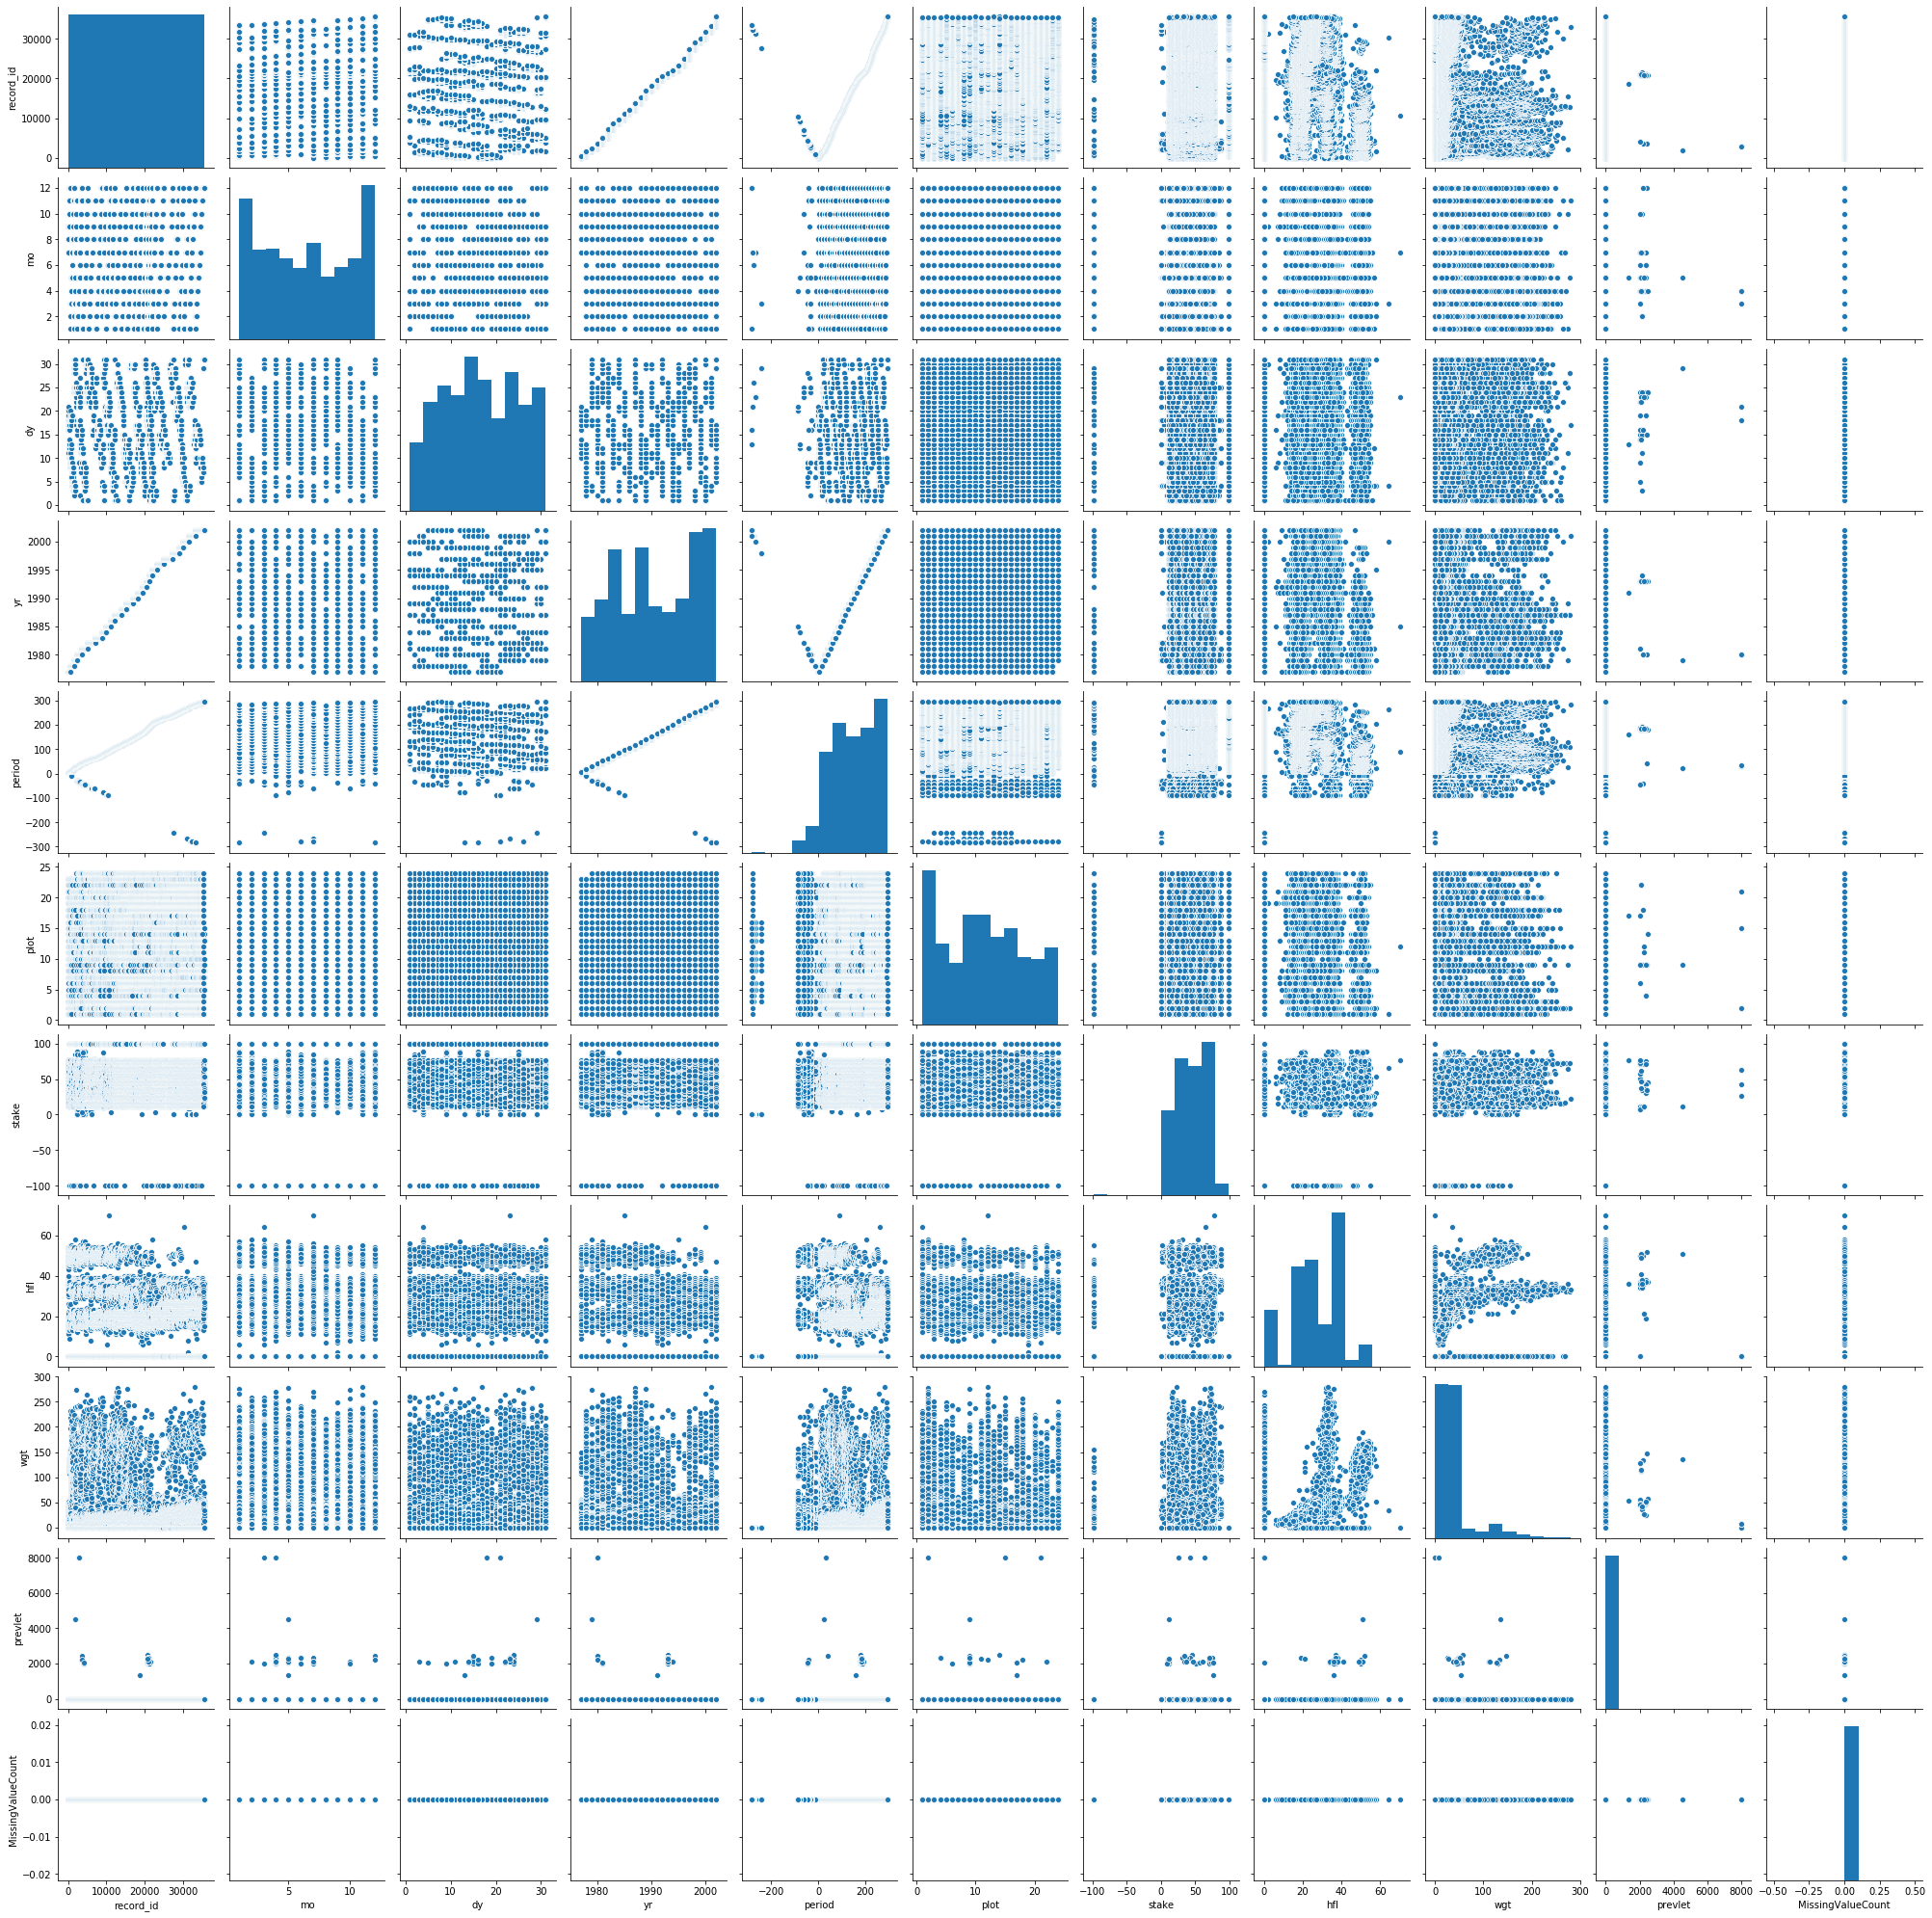

In [367]:
# We can see that we have no more missing values in our data frame. In addition, all the redundant data and typos 
# have been dealt with which will help our data analysis and provide better results. We can now proceed to next step
# and show the analysis in a visual manner

import seaborn as sns
import matplotlib.pyplot as plt

def vizDDA(data):
    sns.pairplot(data)

vizDDA(data)

In [ ]:
# The data looks pretty good now compared to last time and this is where we save the data for future use and the 
# wrangling of this data has been completed